# Double gray vs two stream simulations vs HELIOS1D

Running 500 days of double gray, then 10 days of double gray or 10 days of two stream, and compare output

Injecting TSRT TP profile back into HELIOS1D to compare flux calculations

In [1]:
mjolnir_path = "mjolnir"

idx = 9

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# path to mjolnir code
import sys
sys.path.append(mjolnir_path) 

import pathlib
import re

import h5py
import imageio
import IPython.display as disp


#%matplotlib ipympl
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageOps
# from pygifsicle import optimize

import hamarr as ham
import mjolnir_plot_helper as mph
from file_helpers import get_path_matching_regex, get_path_matching_regex_with_groups


In [4]:
from cycler import cycler


import pandas as pd



In [5]:
custom_cycler = (cycler(linestyle=['-', '--', '-.', ':']) * cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'])      )

helios_path = pathlib.Path("../HELIOS-orig")

hlout = get_path_matching_regex_with_groups("../HELIOS-orig/output/", "alf_prof_iso_(\d+)")

helios_outputs = {}
for p in hlout:
    g = p['groups'][0]
    helios_outputs[g] = f'alf_prof_iso_{g}'
    

In [6]:

tsrt_path = pathlib.Path("spunup_tsrt_r50_iso") 
dgrt_path = pathlib.Path("spunup_dgrt") 

planet_name = "Wasp43b"

FIGSIZE_x = 10
FIGSIZE_y = 7
dpi = 100


FIGSIZE = (FIGSIZE_x, FIGSIZE_y)

In [7]:
class Args:
    pass

In [8]:
def plot_quant(args_, pview_, idx_, fig_, ax_):
    stride_ = 1
    overwrite_ = False
    
    args_.pview = [pview_]

    args_.initial_file = [idx_]
    args_.last_file = [idx_]
    args_.pgrid_ref = [f"pgrid_{idx_}_{idx_}_1.txt"]
    
    pgrid_ref_ = pathlib.Path(args_.file[0]) / args_.pgrid_ref[0]
    if pgrid_ref_.exists():
        pass
    else:
        ham.define_Pgrid(args_.file[0],
                     planet_name,
                     args_.initial_file[0],
                     args_.last_file[0],
                     stride_,
                     overwrite=overwrite_,
                )


    mph.make_plot(args_, False, axis=(fig_, ax_))

def update_axis_title(title, ax):
    ttl = ax.get_title()
    ax.set_title(title + " - " + ttl )

In [9]:
tsrt_args = Args()

file_idx = 0

tsrt_args.pview = ["TP"]
tsrt_args.file = [str(tsrt_path)]
tsrt_args.simulation_ID = ["auto"]
tsrt_args.initial_file = [file_idx]
tsrt_args.last_file = [file_idx]
tsrt_args.horizontal_lev = [2.5e2]
tsrt_args.vertical_top = ["default"]
tsrt_args.split_layer = ["no_split"]
tsrt_args.coordinate_sys = ["icoh"]
tsrt_args.lmax_adjust = [0]
tsrt_args.slice = [0, 180]
tsrt_args.maketable = False
tsrt_args.no_pressure_log = False
tsrt_args.latlonswap = False
tsrt_args.vcoord = ["pressure"]
tsrt_args.pgrid_ref = [f"pgrid_{file_idx}_{file_idx}_1.txt"]
tsrt_args.clevels = [40]

In [10]:
dgrt_args = Args()

dgrt_args.pview = ["TP"]
dgrt_args.file = [str(dgrt_path)]
dgrt_args.simulation_ID = ["auto"]
dgrt_args.initial_file = [file_idx]
dgrt_args.last_file = [file_idx]
dgrt_args.horizontal_lev = [2.5e2]
dgrt_args.vertical_top = ["default"]
dgrt_args.split_layer = ["no_split"]
dgrt_args.coordinate_sys = ["icoh"]
dgrt_args.lmax_adjust = [0]
dgrt_args.slice = [0, 180]
dgrt_args.maketable = False
dgrt_args.no_pressure_log = False
dgrt_args.latlonswap = False
dgrt_args.vcoord = ["pressure"]
dgrt_args.pgrid_ref = [f"pgrid_{file_idx}_{file_idx}_1.txt"]
dgrt_args.clevels = [40]

# TP profile

mjolnir/hamarr.py:518: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  openh5 = h5py.File(fileh5)
mjolnir/hamarr.py:530: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  openh5 = h5py.File(fileh5)
mjolnir/hamarr.py:550: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the globa

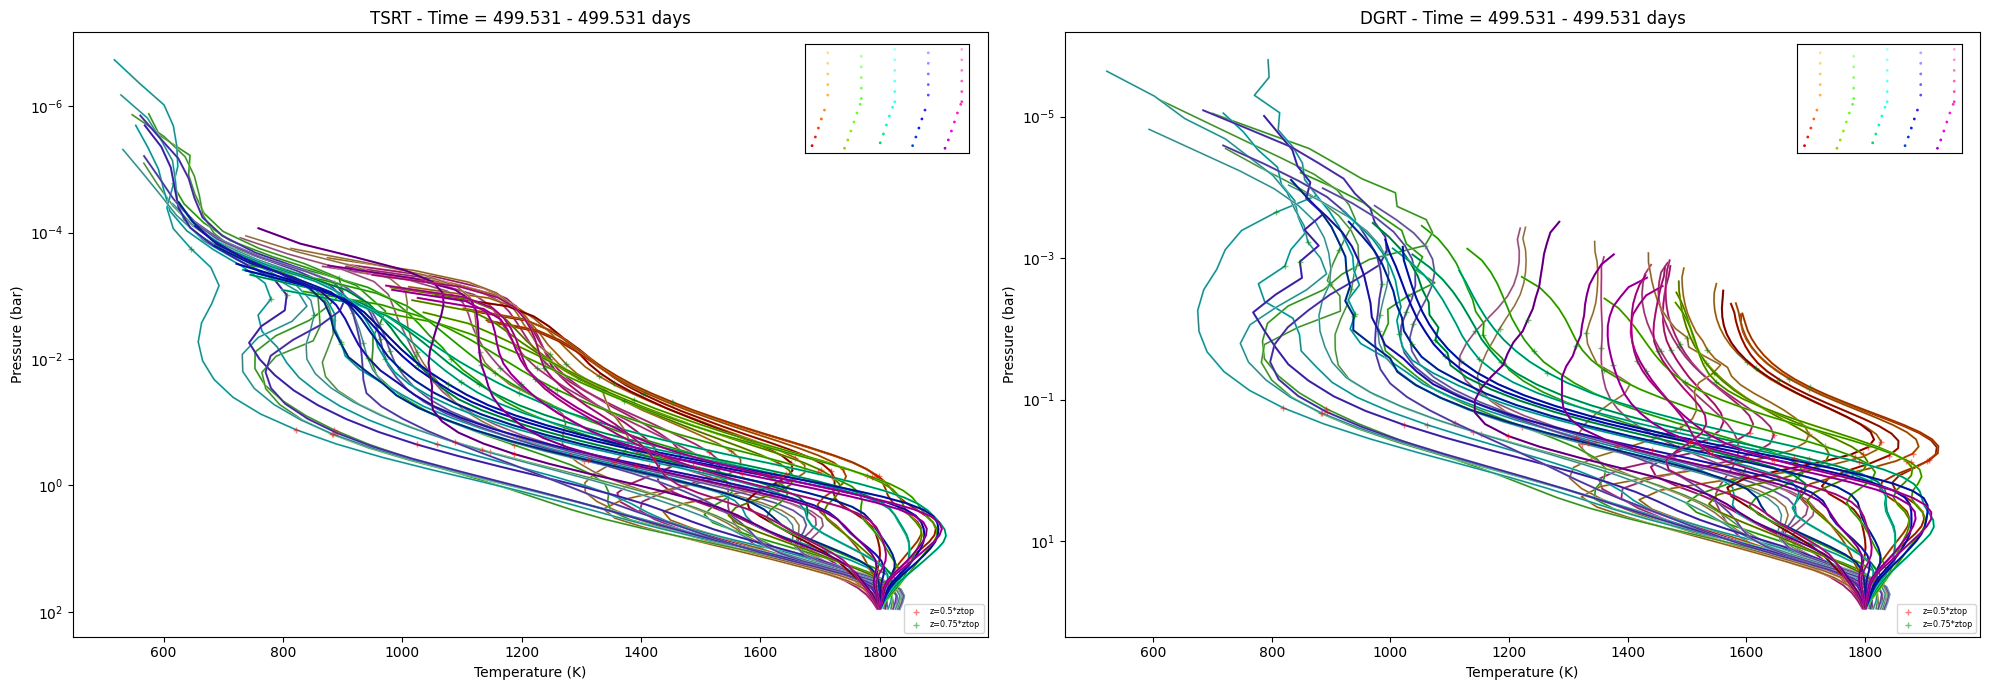

In [11]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

pview = "TP"

plot_quant(tsrt_args, pview, idx, fig, ax1)
plot_quant(dgrt_args, pview, idx, fig, ax2)
update_axis_title("TSRT", ax1)
update_axis_title("DGRT", ax2)


# Q heat

## at 0.25 bar

spunup_tsrt_r50_iso/regrid_Wasp43b_9.h5 not found, regridding now with default settings...
Regrid data in folder spunup_tsrt_r50_iso...

Vertical coordinate = pressure from file spunup_tsrt_r50_iso/pgrid_9_9_1.txt
Regridding time = 9...
Writing file spunup_tsrt_r50_iso/regrid_Wasp43b_9.h5...
Writing file spunup_tsrt_r50_iso/regrid_height_Wasp43b_9.h5...


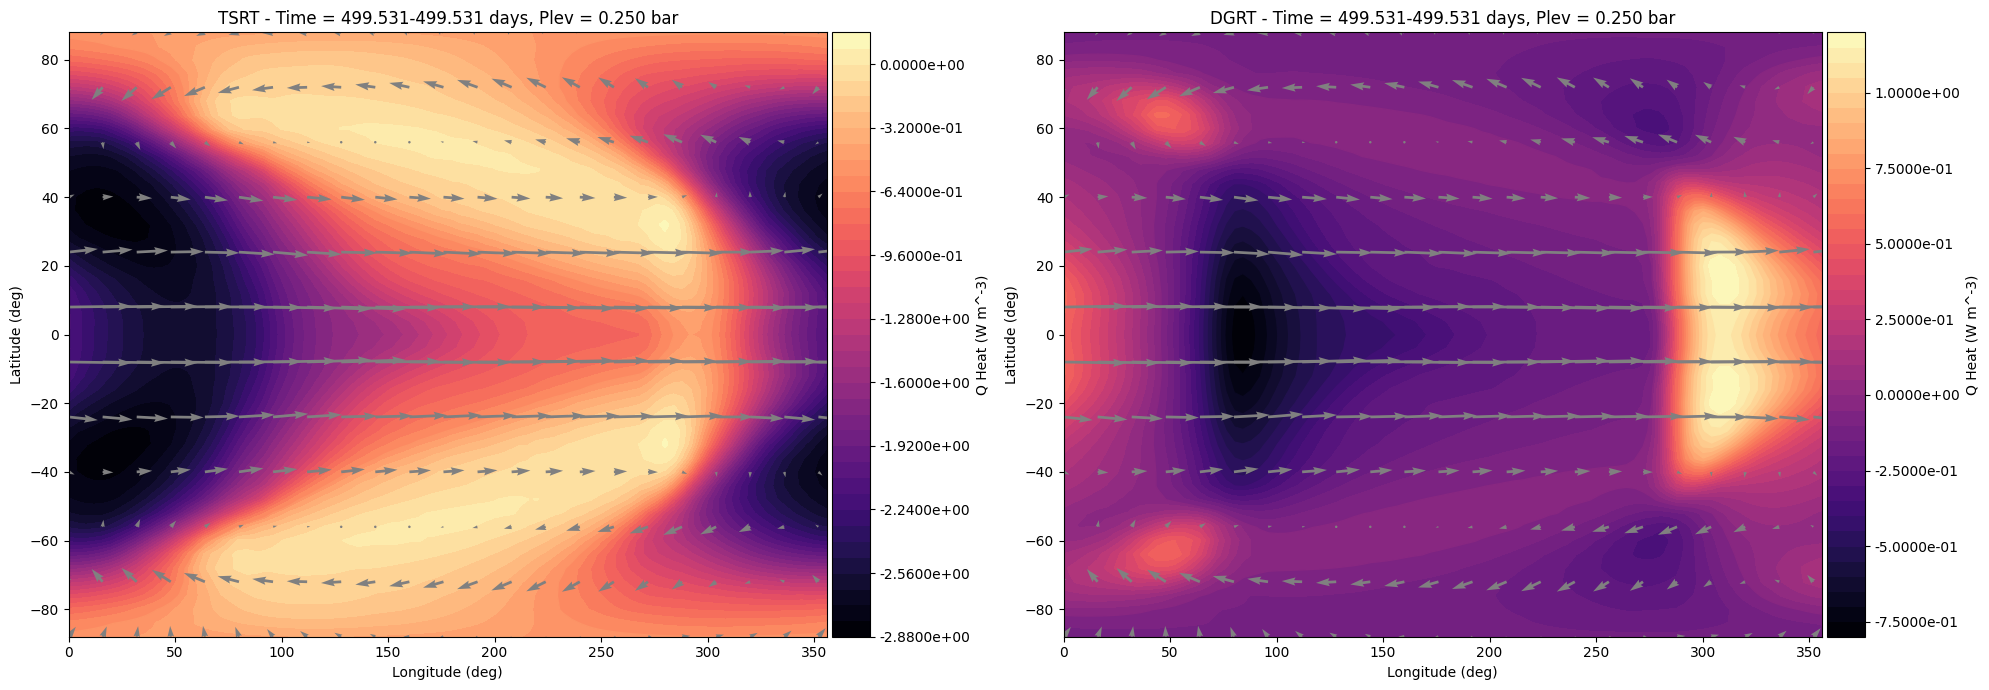

In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

pview = "qheat"

plot_quant(tsrt_args, pview, idx, fig, ax1)
plot_quant(dgrt_args, pview, idx, fig, ax2)

update_axis_title("TSRT", ax1)
update_axis_title("DGRT", ax2)

## Qheat profile

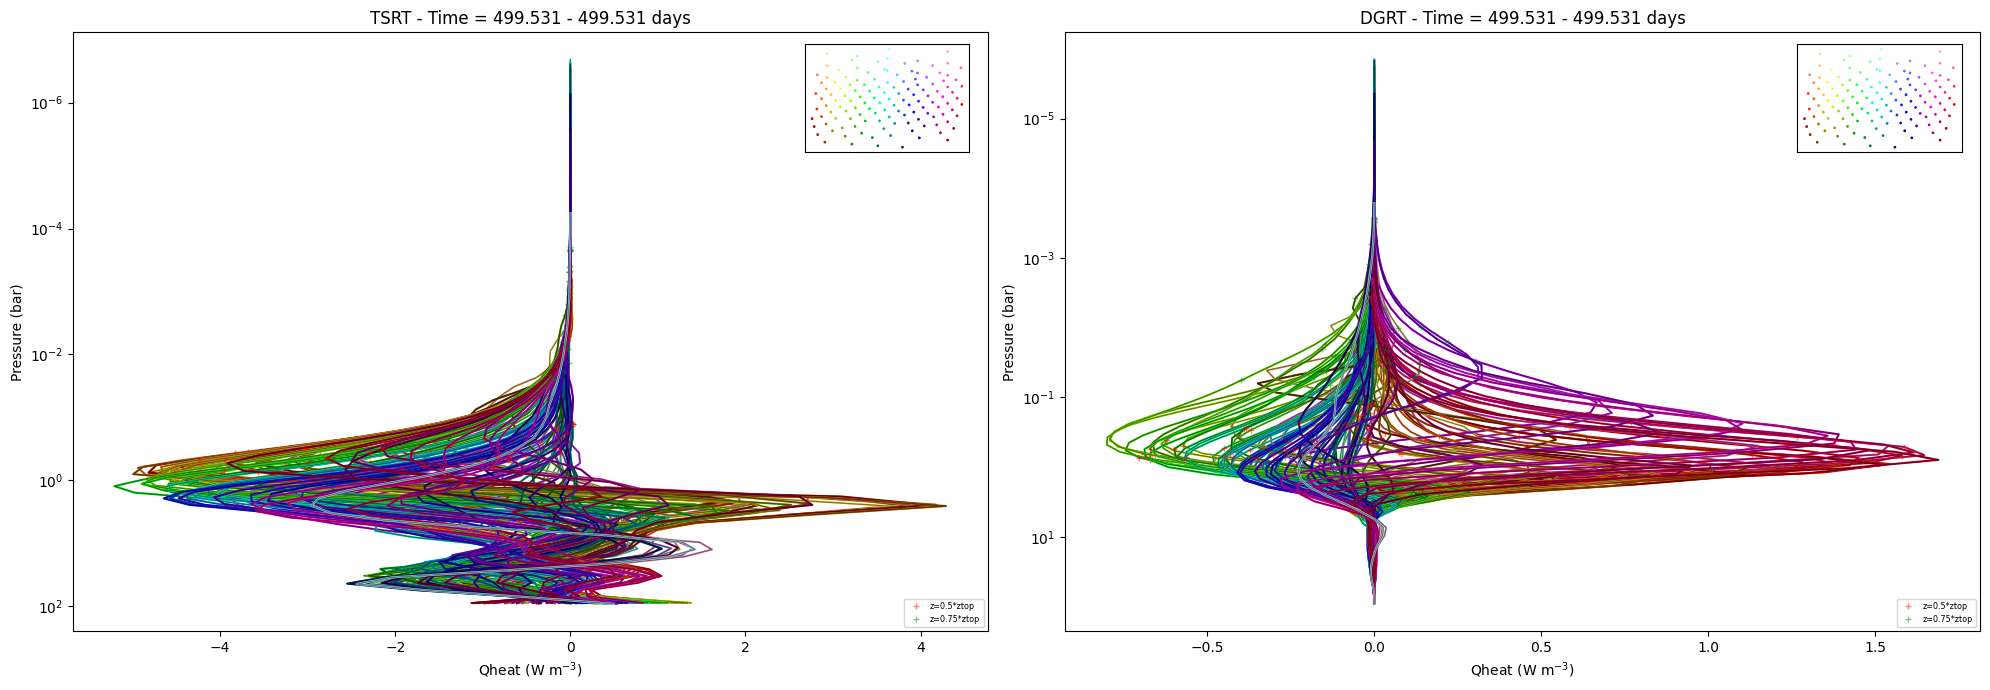

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

plot_quant(tsrt_args, "qheatprof", idx, fig, ax1)
plot_quant(dgrt_args, "qheatprof", idx, fig, ax2)

update_axis_title("TSRT", ax1)
update_axis_title("DGRT", ax2)

# Net flux

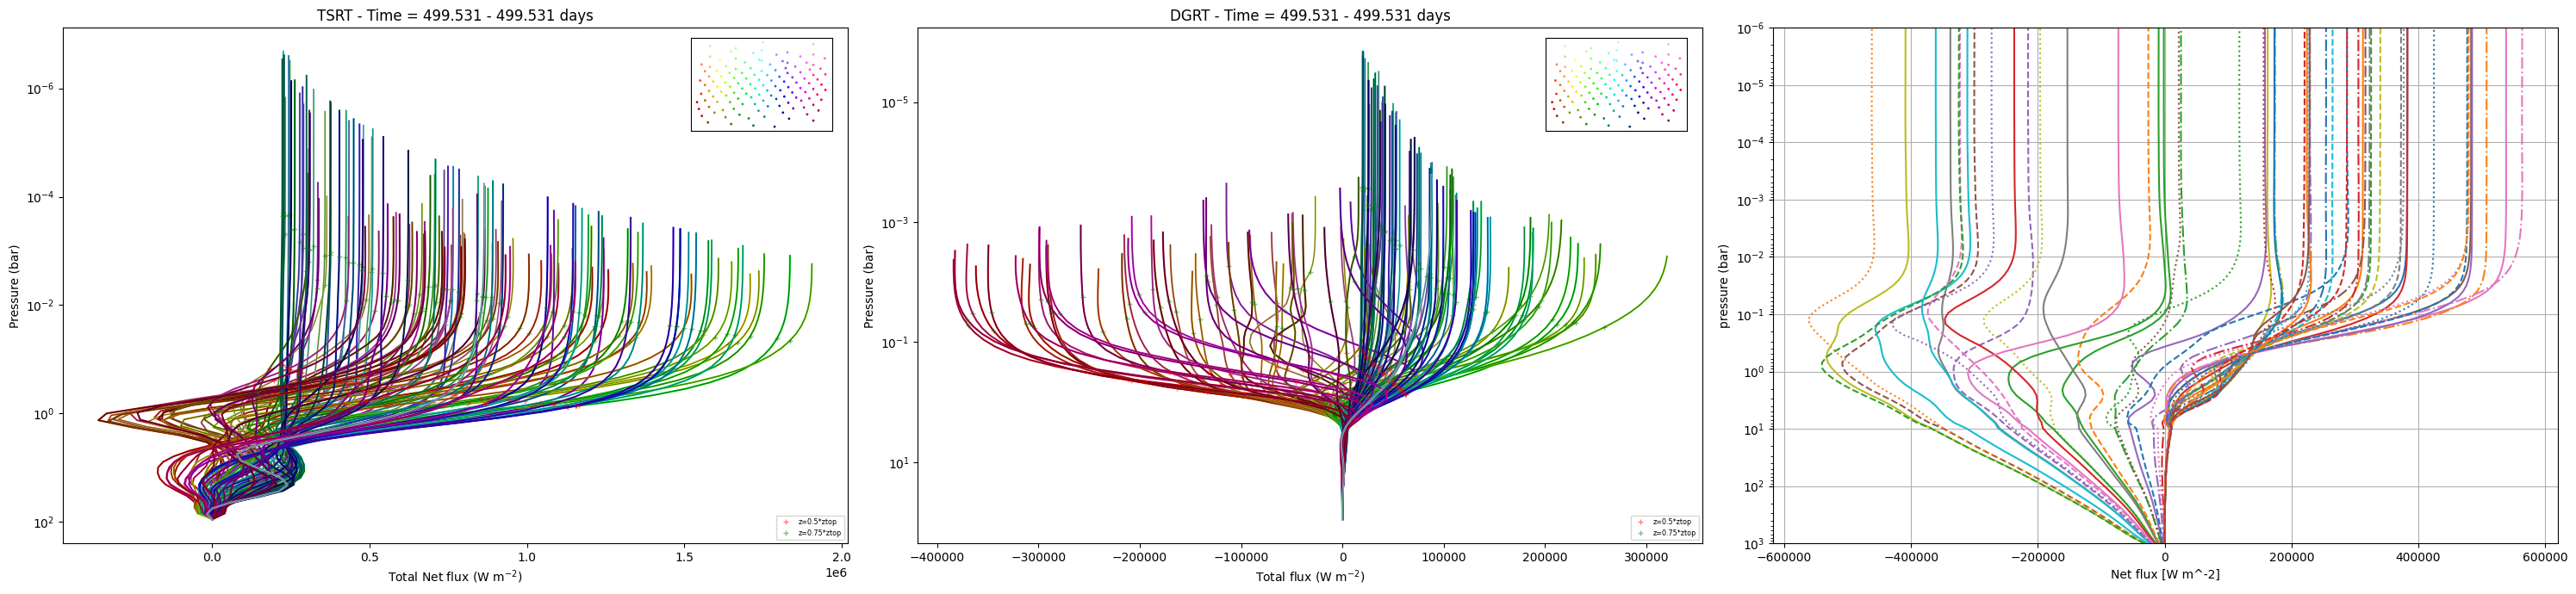

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

plot_quant(tsrt_args, "fnetprof", idx, fig, ax1)
plot_quant(dgrt_args, "fluxprof", idx, fig, ax2)

update_axis_title("TSRT", ax1)
update_axis_title("DGRT", ax2)



ax3.set_prop_cycle(custom_cycler)

for l, d in helios_outputs.items():
    data_path = helios_path / "output" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax3.plot(tp_dat['F_net']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
ax3.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [W m^-2]', ylabel=r'pressure (bar)')
# ax.legend()
ax3.grid(True)

# Up and down flux profile

# Upward Profile


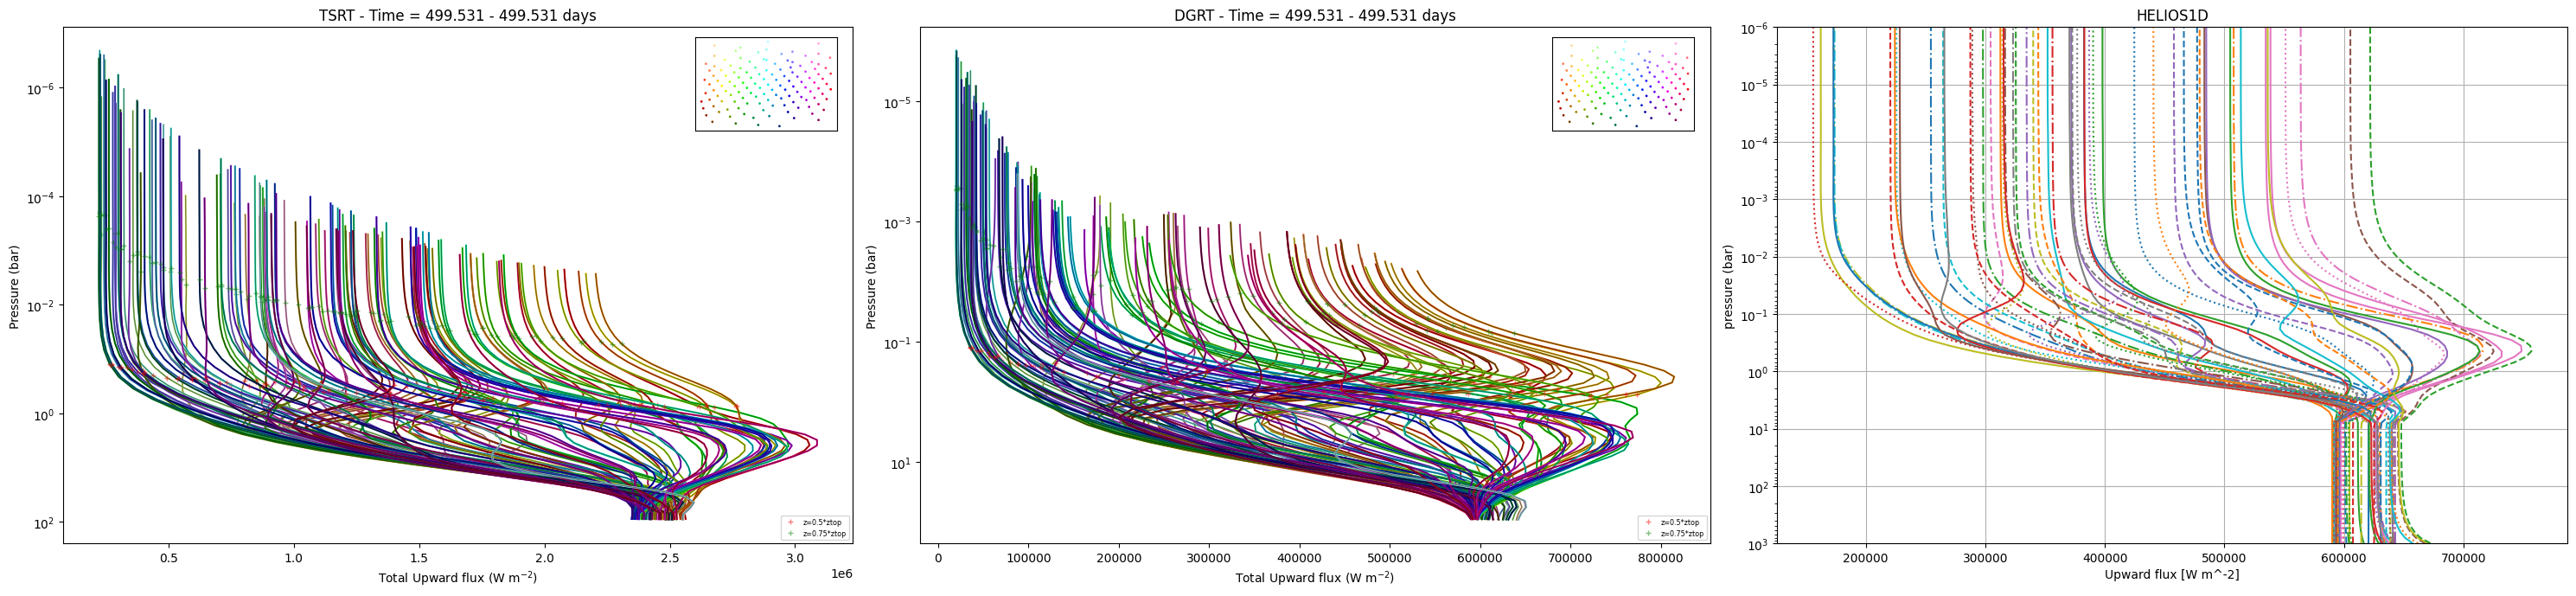

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*FIGSIZE_x, FIGSIZE_y), dpi=dpi)


plot_quant(tsrt_args, "futprof", idx, fig, ax1)
update_axis_title("TSRT", ax1)

plot_quant(dgrt_args, "fupprof", idx, fig, ax2)
update_axis_title("DGRT", ax2)


ax3.set_prop_cycle(custom_cycler)

for l, d in helios_outputs.items():
    data_path = helios_path / "output" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax3.plot(tp_dat['F_up']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
ax3.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Upward flux [W m^-2]', ylabel=r'pressure (bar)')
# ax.legend()
ax3.grid(True)
ax3.set_title("HELIOS1D")
pass





# Downward flux

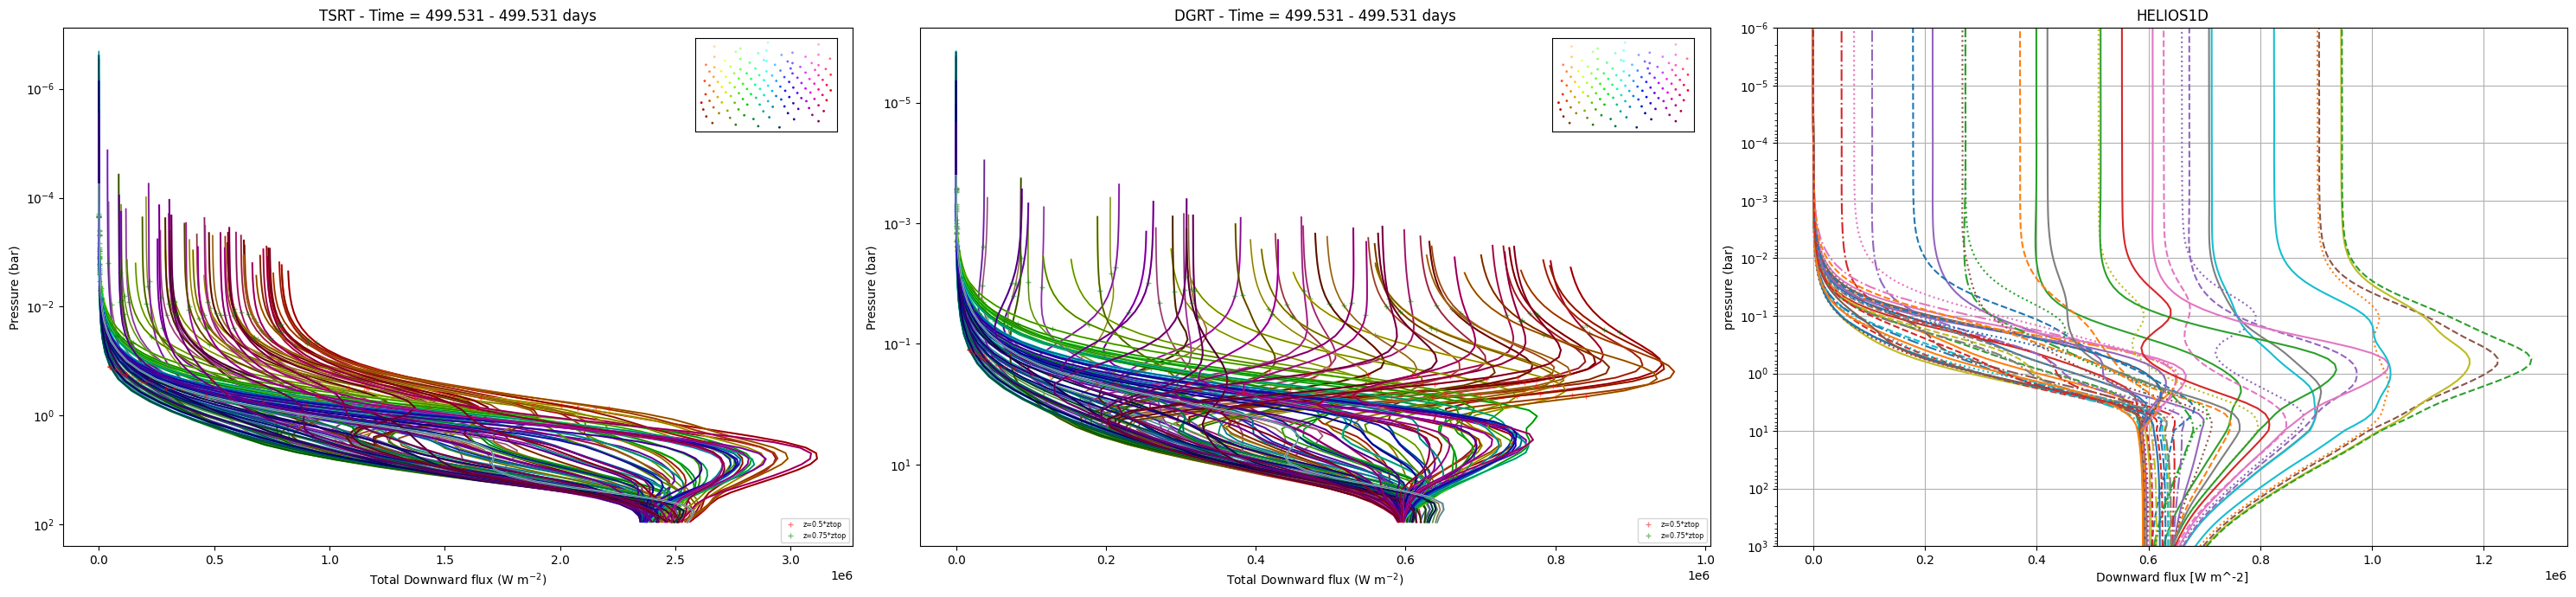

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

plot_quant(tsrt_args, "fdtprof", idx, fig, ax1)
update_axis_title("TSRT", ax1)


plot_quant(dgrt_args, "fdnprof", idx, fig, ax2)
update_axis_title("DGRT", ax2)






ax3.set_prop_cycle(custom_cycler)

for l, d in helios_outputs.items():
    data_path = helios_path / "output" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax3.plot(tp_dat['F_down']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
ax3.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Downward flux [W m^-2]', ylabel=r'pressure (bar)')
# ax.legend()
ax3.grid(True)
ax3.set_title("HELIOS1D")

pass

# Helios 1D

In [17]:
#helios_tools = helios_path 
#sys.path.append(str(helios_path / "tools")) 

#import heliostools as htls

# TP plots at various angles

plots by angle to zenith. 

night side is:
 - no direct beam.
 - stellar spectrum (used for TOA flux) set to planck(T=0K)
 
Or for post processing version ("pp"):

 - no direct beam.
 - stellar spectrum set to planck(0K)
 - TP profile from one of the dayside profile (zenith = 0°, 89°). 
 - only runs HELIOS in post processing mode. Doesn't change the TP profile, outputs computed flux
    

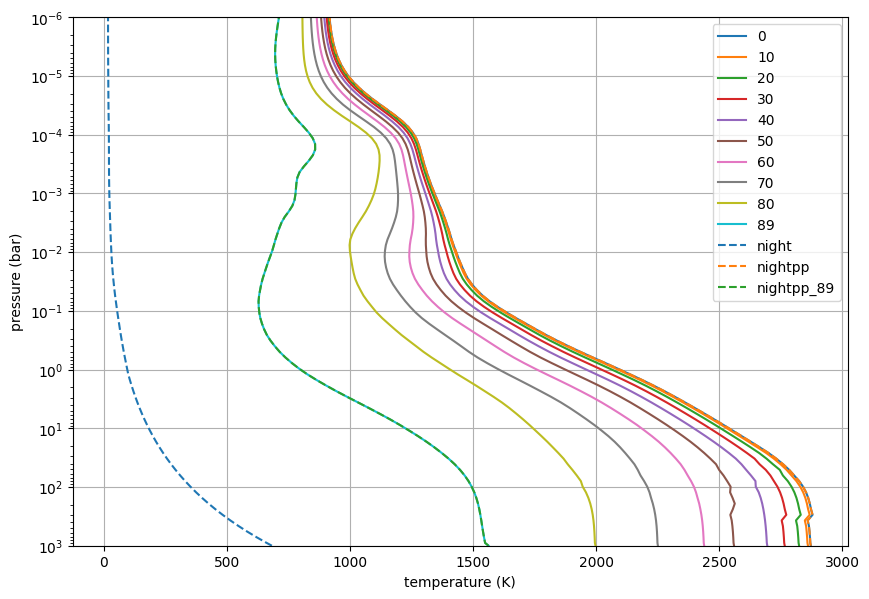

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",    
     "nightpp": "wasp43b_nightppd",
     "nightpp_89": "wasp43b_nightpp_89d"            
    }


ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "output" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_tp.dat", sep="\s+", skiprows=1, header=0)



    ax.plot(tp_dat['temp.[K]'], 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'temperature (K)', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)


# Downward flux

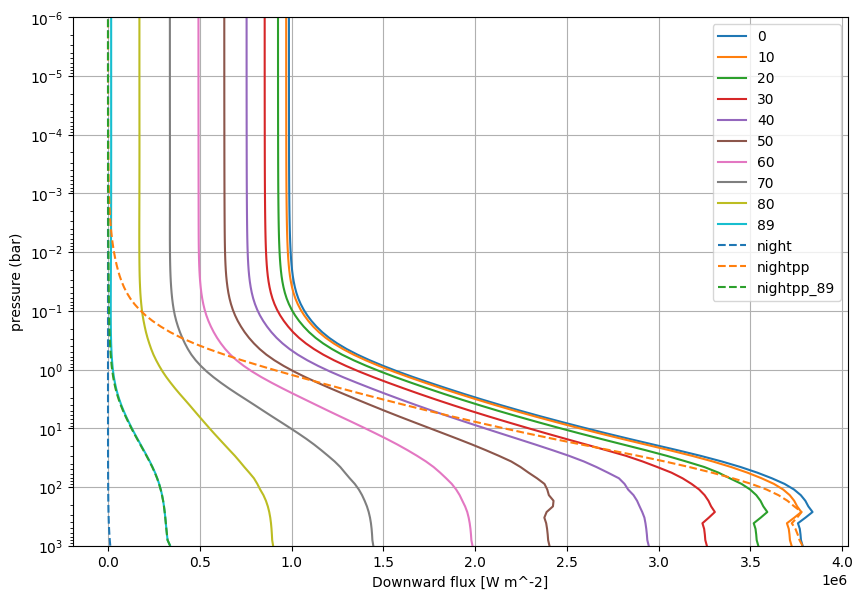

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",    
     "nightpp": "wasp43b_nightppd",
     "nightpp_89": "wasp43b_nightpp_89d"        
    }

ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "output" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks=1e-3
    ax.plot(tp_dat['F_down']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Downward flux [W m^-2]', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)

# Upward flux

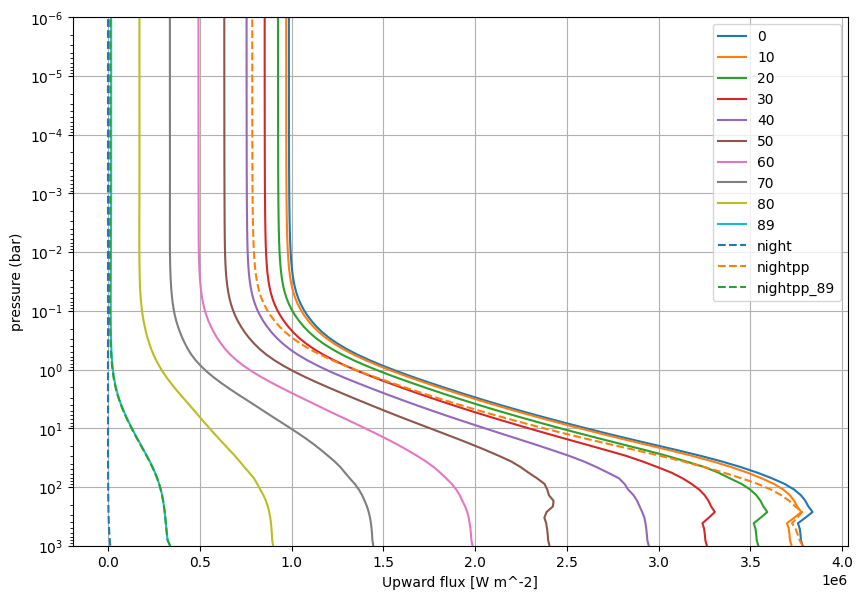

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",    
     "nightpp": "wasp43b_nightppd",
     "nightpp_89": "wasp43b_nightpp_89d"            
    }

ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "output" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax.plot(tp_dat['F_up']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Upward flux [W m^-2]', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)

# Net flux

without post processed night spectrum

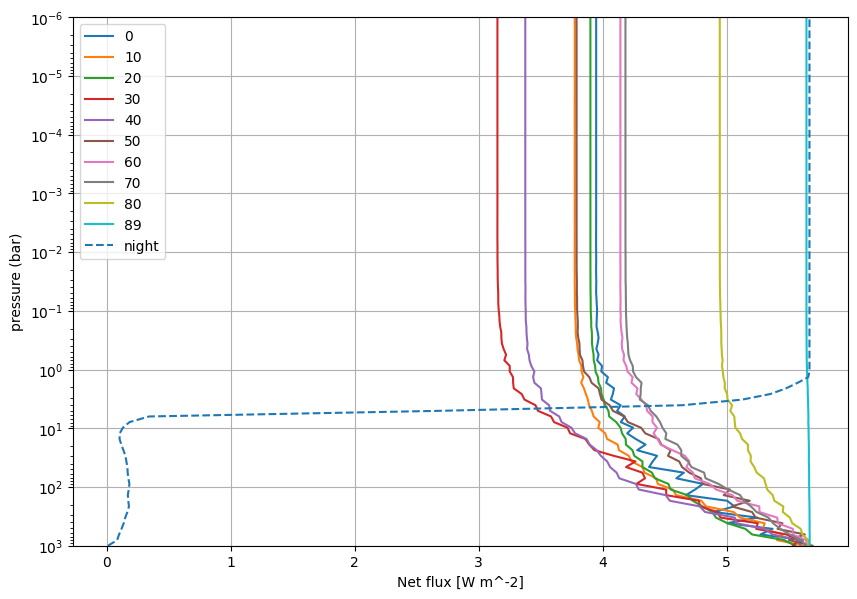

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",
     #"nightpp_89": "wasp43b_nightpp_89d"    
    }

ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "output" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax.plot(tp_dat['F_net']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    

ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [W m^-2]', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)

with post processed night spectrum

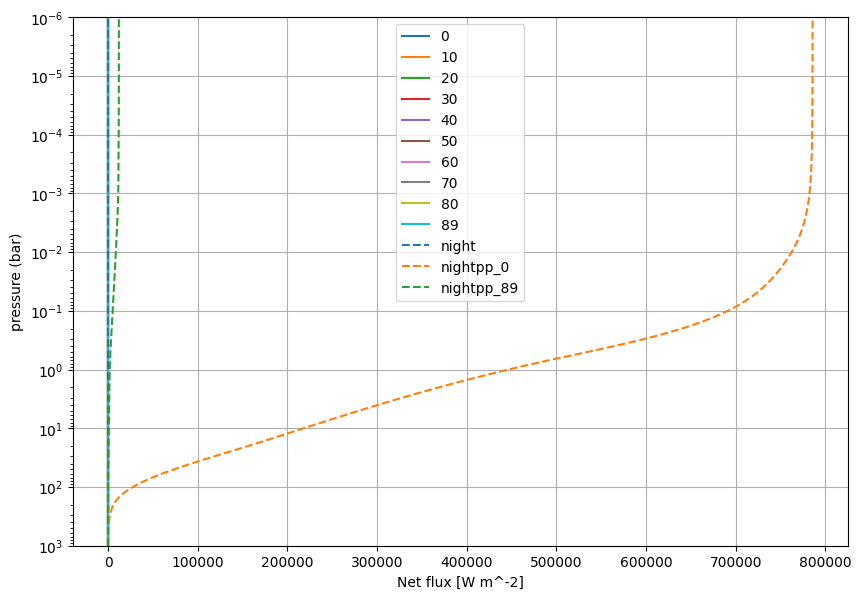

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",    
     "nightpp_0": "wasp43b_nightppd",
     "nightpp_89": "wasp43b_nightpp_89d"    
    }

ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "output" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax.plot(tp_dat['F_net']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [W m^-2]', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)

with only 89 degree day side TP profile used for night side

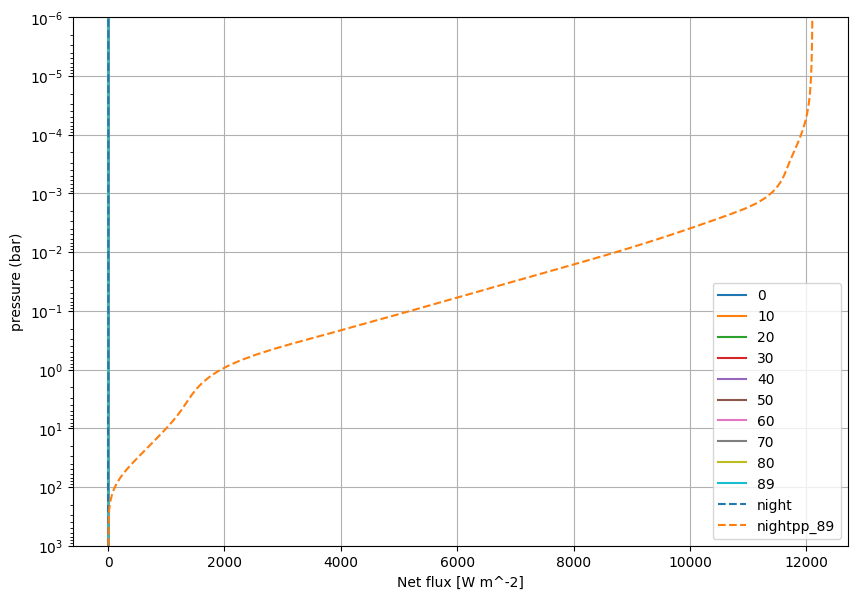

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

l = {"0": "wasp43b_0d",
    "10": "wasp43b_10d",
    "20": "wasp43b_20d",
    "30": "wasp43b_30d",
    "40": "wasp43b_40d",
    "50": "wasp43b_50d",
    "60": "wasp43b_60d",
    "70": "wasp43b_70d",
    "80": "wasp43b_80d",
    "89": "wasp43b_89d",
    "night": "wasp43b_nightd",    
     #"nightpp_0": "wasp43b_nightppd",
     "nightpp_89": "wasp43b_nightpp_89d"    
    }

ax.set_prop_cycle(custom_cycler)

for l, d in l.items():
    data_path = helios_path / "output" / d
    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


    cgs2mks = 1e-3
    ax.plot(tp_dat['F_net']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [W m^-2]', ylabel=r'pressure (bar)')
ax.legend()
ax.grid(True)

In [24]:
# THOR TP profile injected into HELIOS

## Inject TP profiles from THOR into HELIOS and generate fluxes

In [25]:
# Net flux

In [26]:
#fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)
#
#ax.set_prop_cycle(custom_cycler)

#for l, d in outputs.items():
#    data_path = helios_path / "output" / d
#    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)


#    cgs2mks = 1e-3
#    ax.plot(tp_dat['F_net']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
##ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [W m^-2]', ylabel=r'pressure (bar)')
## ax.legend()
#ax.grid(True)

In [27]:
# Upward and Downward flux


In [28]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)
#
#ax1.set_prop_cycle(custom_cycler)
#
#for l, d in outputs.items():
#    data_path = helios_path / "output" / d
#    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)
#
#
#    cgs2mks = 1e-3
#    ax1.plot(tp_dat['F_up']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
##ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
#ax1.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Upward flux [W m^-2]', ylabel=r'pressure (bar)')
## ax.legend()
#ax1.grid(True)
#
#ax2.set_prop_cycle(custom_cycler)
#
#for l, d in outputs.items():
#    data_path = helios_path / "output" / d
#    tp_dat  = pd.read_csv(data_path / f"{d}_integrated_flux.dat", sep="\s+", skiprows=2, header=0)
#

#    cgs2mks = 1e-3
#    ax2.plot(tp_dat['F_down']*cgs2mks, 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
##ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
#ax2.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Downward flux [W m^-2]', ylabel=r'pressure (bar)')
## ax.legend()
#ax2.grid(True)

In [29]:
# TP profile

In [30]:
#fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)
#
#ax.set_prop_cycle(custom_cycler)
#
#for l, d in outputs.items():
#    data_path = helios_path / "output" / d
#    tp_dat  = pd.read_csv(data_path / f"{d}_tp.dat", sep="\s+", skiprows=1, header=0)
#
#
#
#    ax.plot(tp_dat['temp.[K]'], 1e-6*tp_dat['press.[10^-6bar]'], label=l)
    
#ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'temperature (K)', ylabel=r'pressure (bar)')
#ax.legend()
#ax.grid(True)

# Planck function

In [31]:
plkout = get_path_matching_regex_with_groups("dbgdump/", "planck_(\d+).dat")

planck_outputs = {}
for p in plkout:
    g = p['groups'][0]
    planck_outputs[int(g)] = p['path']
    
# read matching idx

planck_data = pd.read_csv(planck_outputs[idx], sep='\s+', dtype={'col': np.int32, 'pressure': np.float64, 'temperature': np.float64, 'planck': np.float64})

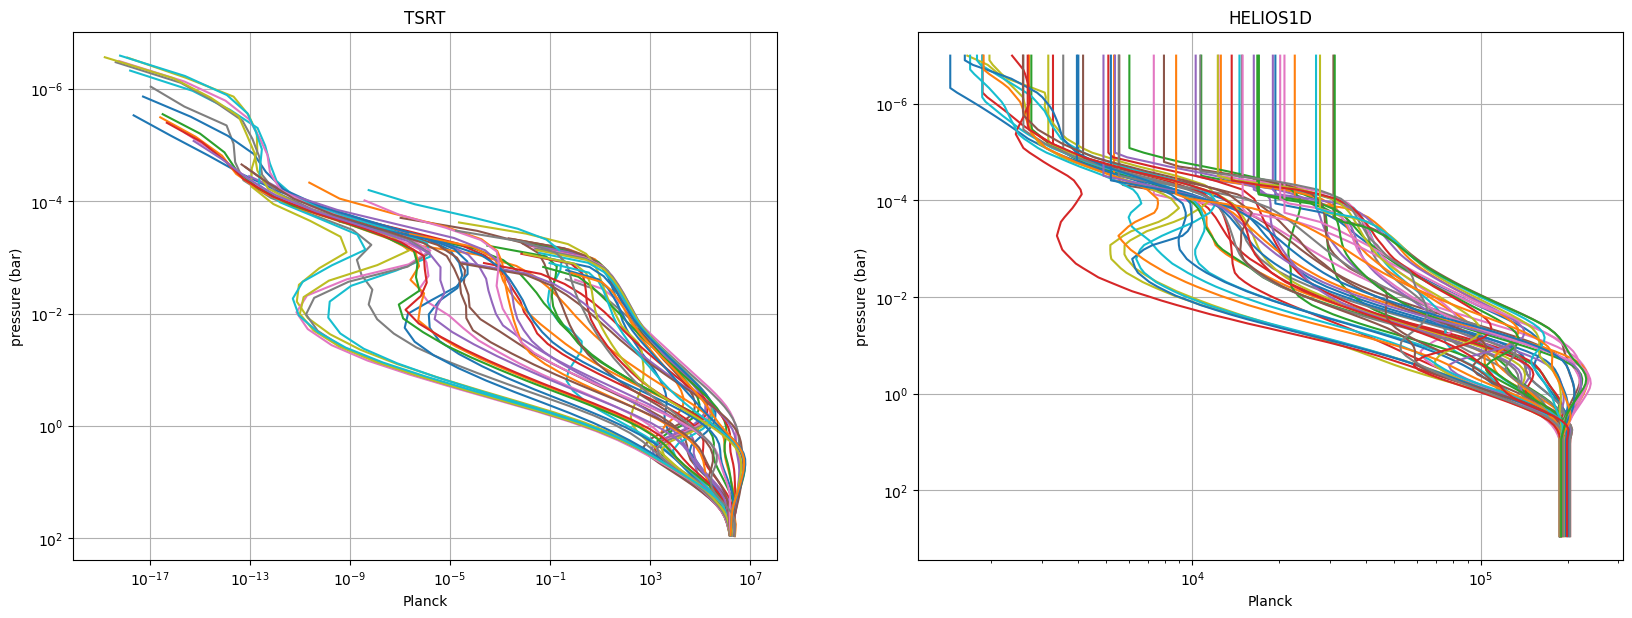

In [32]:
fig, (ax1, ax2 ) = plt.subplots(1, 2, figsize=(2*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

#plot_quant(tsrt_args, "planck", idx, fig, ax1)
#update_axis_title("TSRT", ax1)


stride = 50


ax3.set_prop_cycle(custom_cycler)

for c in range(0, 2562, stride):
    data = planck_data[planck_data['col'] == c]
    
    pressure = data['pressure']
    planck_val = data['planck']
    
    ax1.plot(planck_val, pressure/100000, label=l)

##ax.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Net flux [erg s^-1 cm^-2]', ylabel=r'pressure (bar)')
#ax2.set(ylim=[1e3, 1e-6], yscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')
ax1.set(yscale='log', xscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')
ax1.invert_yaxis()
## ax.legend()
ax1.grid(True)
ax1.set_title("TSRT")

    
for l, d in helios_outputs.items():
    data_path = helios_path / "output" / d
    dat  = pd.read_csv(data_path / f"{d}_planck_cent.dat", sep="\s+", skiprows=2, header=0)

    
    pl = ((1e-1*dat.loc[:,'B_lay[0]':'B_lay[104]']).multiply(1e-6*dat['delta_lambda[um]'], axis='index')).sum().values
    
    
    
    tp_dat  = pd.read_csv(data_path / f"{d}_tp.dat", sep="\s+", skiprows=1, header=0)


    
    pr =  1e-6*(tp_dat['press.[10^-6bar]'].values[1:])



    ax2.plot(pl, pr, label=l)
    
    
ax2.set(yscale='log', xscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')
ax2.invert_yaxis()
## ax.legend()
ax2.grid(True)
ax2.set_title("HELIOS1D")

pass

In [33]:
planck_data[planck_data['col'] == 500]

col      pressure  temperature        planck
20000  500  9.044510e+06     1824.410  2.224510e+06
20001  500  7.087190e+06     1826.360  2.280400e+06
20002  500  5.554270e+06     1826.390  2.281190e+06
20003  500  4.350880e+06     1818.530  2.063760e+06
20004  500  3.401930e+06     1797.840  1.579240e+06
20005  500  2.650270e+06     1764.920  1.018270e+06
20006  500  2.053850e+06     1723.990  5.765870e+05
20007  500  1.581440e+06     1679.420  3.006920e+05
20008  500  1.209050e+06     1634.400  1.502720e+05
20009  500  9.175190e+05     1591.530  7.485070e+04
20010  500  6.912100e+05     1552.360  3.828730e+04
20011  500  5.170310e+05     1515.750  1.982830e+04
20012  500  3.839470e+05     1478.410  9.802460e+03
20013  500  2.828130e+05     1436.820  4.282760e+03
20014  500  2.063040e+05     1389.070  1.557270e+03
20015  500  1.487140e+05     1334.850  4.523210e+02
20016  500  1.056700e+05     1275.420  1.034010e+02
20017  500  7.381050e+04     1211.660  1.807300e+01
20018  500  5.053090e+04     1145.220  2.387310e+00
20019  500  3.380480e+04     1078.690  2.450350e-01
20020  500  2.204660e+04     1015.740  2.161580e-02
20021  500  1.400090e+04      959.805  1.912850e-03
20022  500  8.661230e+03      912.038  1.906580e-04
20023  500  5.226060e+03      871.596  2.220970e-05
20024  500  3.083280e+03      840.679  3.732980e-06
20025  500  1.789690e+03      825.962  1.525820e-06
20026  500  1.032140e+03      824.650  1.405470e-06
20027  500  5.973190e+02      840.168  3.623360e-06
20028  500  3.506580e+02      869.434  1.968330e-05
20029  500  2.088590e+02      877.303  3.043000e-05
20030  500  1.247040e+02      872.299  2.309690e-05
20031  500  7.406980e+01      857.119  9.783910e-06
20032  500  4.328710e+01      815.618  7.973940e-07
20033  500  2.441920e+01      752.613  1.043080e-08
20034  500  1.309880e+01      694.488  9.518420e-11
20035  500  6.671500e+00      649.362  1.390330e-12
20036  500  3.245910e+00      616.651  4.414930e-14
20037  500  1.519350e+00      590.155  2.047280e-15
20038  500  6.850500e-01      563.460  6.898930e-17
20039  500  2.965580e-01      538.754  2.215740e-18

In [45]:
plk_grd = pd.read_csv("planckgrid.txt", sep='\s+', header=None, names=['d','n', 'planck', 'lambda', 'delta_lambda'])

In [46]:
plk_grd['T'] = plk_grd['d']*2 

In [53]:
T = 3500
lmbda = plk_grd[plk_grd['T'] == T]['lambda']
plk = plk_grd[plk_grd['T'] == T]['planck']

[None, Text(0, 0.5, 'pressure (bar)'), None, Text(0.5, 0, 'Planck')]

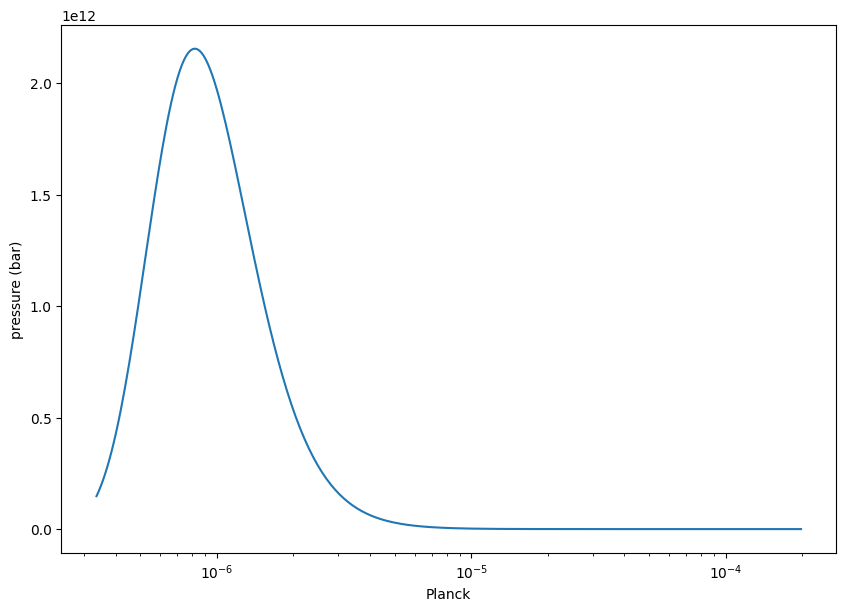

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(1*FIGSIZE_x, FIGSIZE_y), dpi=dpi)

ax.plot(lmbda, plk)

ax.set(yscale='linear', xscale='log', xlabel=r'Planck', ylabel=r'pressure (bar)')